## Exploratory Data Analysis

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

c:\Users\alber\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter for US Data Analyst and Data Scientist roles

In [2]:
job_titles=["Data Analyst", "Data Scientist"]
df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")]

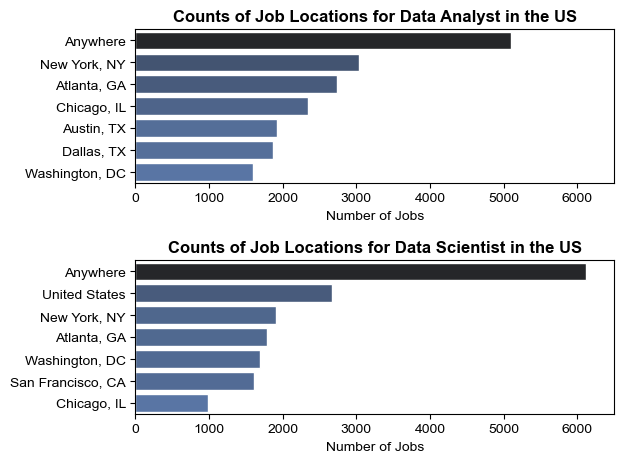

In [3]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_US[df_US["job_title_short"] == job_title].groupby("job_location").agg(count=("job_title_short", "count")).sort_values(by="count", ascending=False).head(7)
    sns.barplot(x="count", y="job_location", data=df_plot, ax=ax[i], hue="count", palette="dark:b_r", legend=False)    
    ax[i].set_title(f"Counts of Job Locations for {job_title} in the US", fontweight="bold")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 6500)
    ax[i].set_xlabel("Number of Jobs")
    
plt.tight_layout()
plt.show()

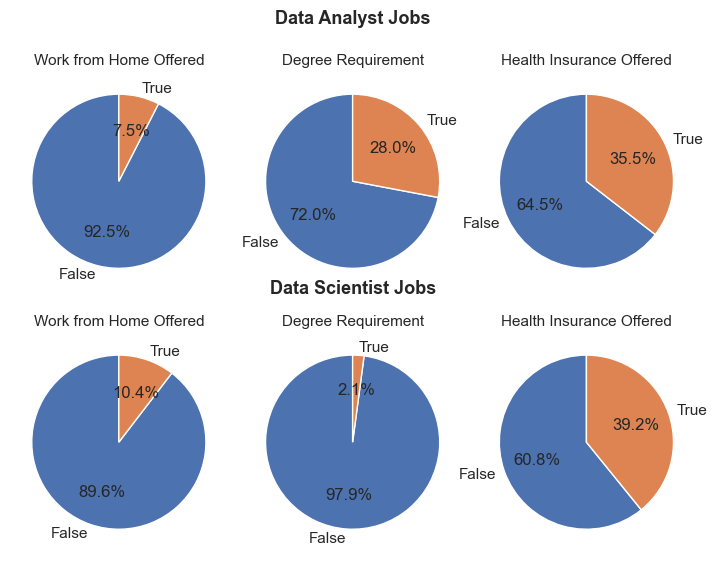

In [4]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}
sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 3, figsize=(2, 1))
fig.set_size_inches(8, 6)

for i, job_title in enumerate(job_titles):
    fig.text(0.5, 0.92 - i * 0.45, f"{job_title} Jobs", ha='center', fontsize=13, fontweight='bold')
    for e, (column, title) in enumerate(dict_column.items()):
        filtered_df = df_US[df_US["job_title_short"] == job_title].dropna(subset=[column])
        ax[i, e].pie(filtered_df[column].value_counts(),  startangle=90, autopct="%1.1f%%", labels=["False", "True"])
        ax[i, e].set_title(title, size=11)

plt.subplots_adjust(top=0.2, bottom=0.1, left=0.1, right=0.9, hspace=2, wspace=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

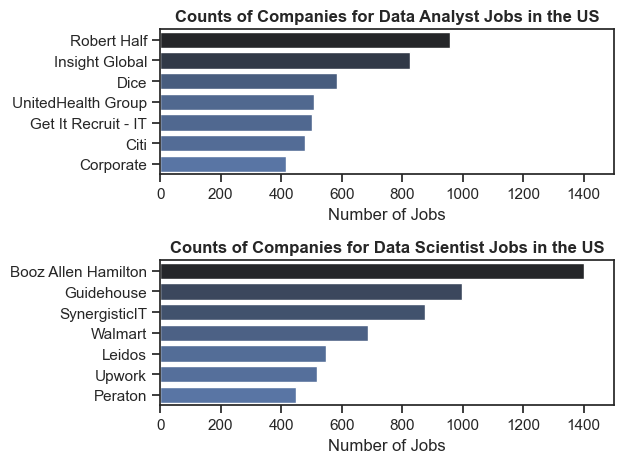

In [5]:
df_US.loc[:, "company_name"]=df_US.loc[:,"company_name"].apply(lambda x: "Get It Recruit - IT" if x == "Get It Recruit - Information Technology" else x)

fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_US[df_US["job_title_short"] == job_title]["company_name"].value_counts().head(7).to_frame()
    sns.barplot(x="count", y="company_name", data=df_plot, ax=ax[i], hue="count", palette="dark:b_r", legend=False)    
    ax[i].set_title(f"Counts of Companies for {job_title} Jobs in the US", fontweight="bold")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 1500)
    ax[i].set_xlabel("Number of Jobs")
    
plt.tight_layout()
plt.show()

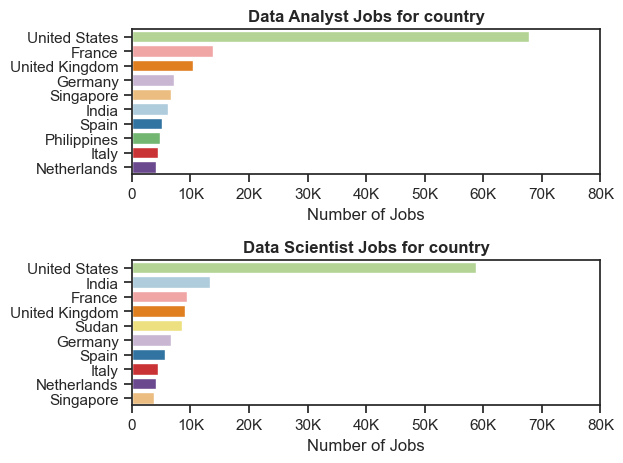

In [6]:
def custom_formatter(x, pos):
    if x < 1000:
        return f'{int(x)}'
    else:
        return f'{int(x/1000)}K'

fig, ax = plt.subplots(2, 1)
country_colors = {
    "United States": "#b2df8a",
    "France": "#fb9a99",
    "United Kingdom": "#ff7f00",
    "Germany": "#cab2d6",
    "Singapore": "#fdbf6f",
    "India": "#a6cee3",
    "Spain": "#1f78b4",
    "Philippines": "#66c266",
    "Italy": "#e31a1c",
    "Netherlands": "#6a3d9a",
    "Sudan": "#ffed6f"
}
for i, job_title in enumerate(job_titles):
    df_plot = df[df["job_title_short"] == job_title]["job_country"].value_counts().head(10).to_frame()
    df_plot['job_country'] = df_plot.index  
    df_plot['color'] = df_plot['job_country'].map(country_colors)  

    sns.barplot(x="count", y="job_country", data=df_plot, ax=ax[i], hue="job_country", palette=country_colors, legend=False)    
    ax[i].set_title(f"{job_title} Jobs for country", fontweight="bold")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 80000)
    ax[i].set_xlabel("Number of Jobs")
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()

In [7]:
import pycountry
import pycountry_convert as pc

df_world=df[df["job_title_short"].isin(job_titles)].copy()

def find_country(country):
        country_name = pycountry.countries.get(name=country)
        
        if country_name is None:
            return None
        
        country_alpha2 = country_name.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        
        continents = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        
        return continents.get(continent_code)

df_world["Continent"]=df_world["job_country"].apply(lambda x: find_country(x) if not pd.isna(x) else None)

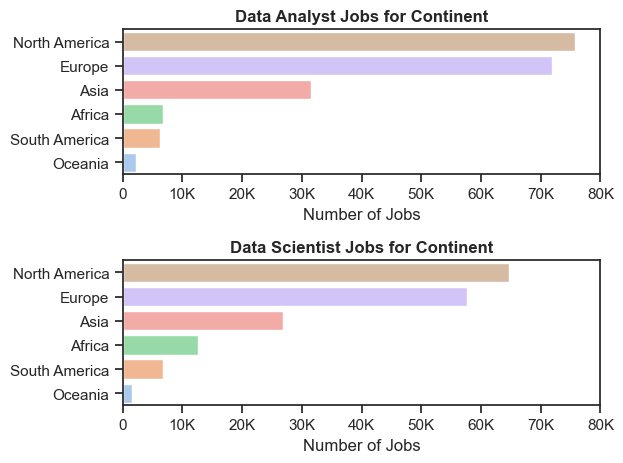

In [8]:
df_world_nan=df_world.copy().dropna(subset="Continent")

fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_world_nan[df_world_nan["job_title_short"] == job_title]["Continent"].value_counts().to_frame()
    sns.barplot(x="count", y="Continent", data=df_plot, ax=ax[i], hue="count", palette="pastel", legend=False)    
    ax[i].set_title(f"{job_title} Jobs for Continent", fontweight="bold")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 80000)
    ax[i].set_xlabel("Number of Jobs")
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()

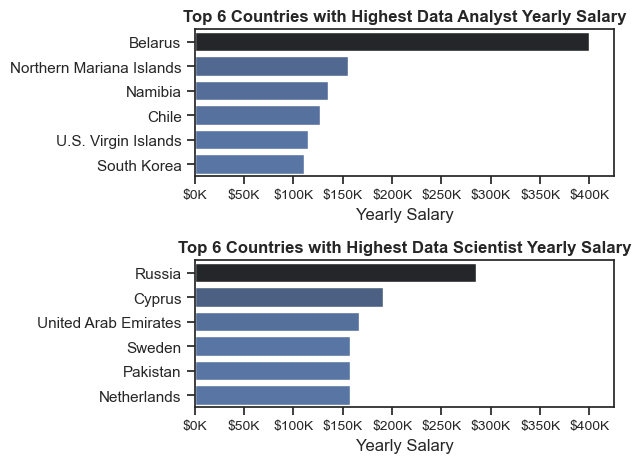

In [9]:
df_salary=df_world.copy().dropna(subset="salary_year_avg")

fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_salary[df_salary["job_title_short"] == job_title].groupby("job_country")["salary_year_avg"].agg(func="median").sort_values(ascending=False).head(6).to_frame()
    sns.barplot(x="salary_year_avg", y="job_country", data=df_plot, ax=ax[i], hue="salary_year_avg", palette="dark:b_r", legend=False)    
    ax[i].set_title(f"Top 6 Countries with Highest {job_title} Yearly Salary", fontweight="bold")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 425000)
    ax[i].set_xlabel("Yearly Salary")
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    ax[i].tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()

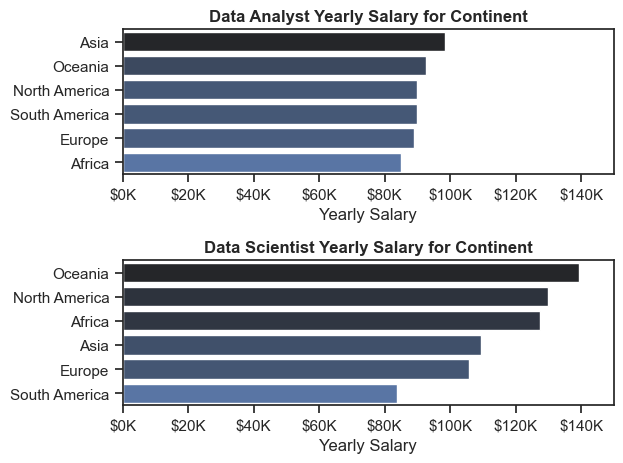

In [10]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_world[df_world["job_title_short"] == job_title].groupby("Continent")["salary_year_avg"].agg(func="median").sort_values(ascending=False).head(6).to_frame()
    sns.barplot(x="salary_year_avg", y="Continent", data=df_plot, ax=ax[i], hue="salary_year_avg", palette="dark:b_r", legend=False)    
    ax[i].set_title(f"{job_title} Yearly Salary for Continent", fontweight="bold")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 150000)
    ax[i].set_xlabel("Yearly Salary")
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    
plt.tight_layout()
plt.show()